In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn

In [ ]:
wn.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# **REGENERATING REPORT**

In [ ]:
!pip install dataprep
from dataprep.eda import create_report

In [ ]:
report=create_report(data,title="FETAL_HEALTH")

ERROR:bokeh.core.validation.check:E-1019 (DUPLICATE_FACTORS): FactorRange must specify a unique list of categorical factors for an axis: duplicate factors found: 'mean_value_of...ity'


In [ ]:
report.save("/content/fetal_health_report.html")

Report has been saved to /content/fetal_health_report.html!


In [ ]:
report

# **PRE-PROCESSING AND PLOTS**

In [ ]:
# Checking for missing values and categorical variables in the dataset
data.info()

In [ ]:
# Visualizing the missing values in the dataset,
missing_values = msno.bar(data, figsize = (16,5),color = "#483D8B")

In [ ]:
# Doing Univariate Analysis for statistical description and understanding of dispersion of data
data.describe().T

In [ ]:
num_cols = [col for col in data.columns if data[col].dtype != 'object']

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column],color="#483D8B")
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
# defining functions to create plot

def violin(col):
    fig = px.violin(data, y=col, x="fetal_health", color="fetal_health", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(data, hue="fetal_health", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

def scatter(col1, col2):
    fig = px.scatter(data, x=col1, y=col2, color="fetal_health", template = 'plotly_dark')
    return fig.show()

In [ ]:
violin('histogram_number_of_peaks')

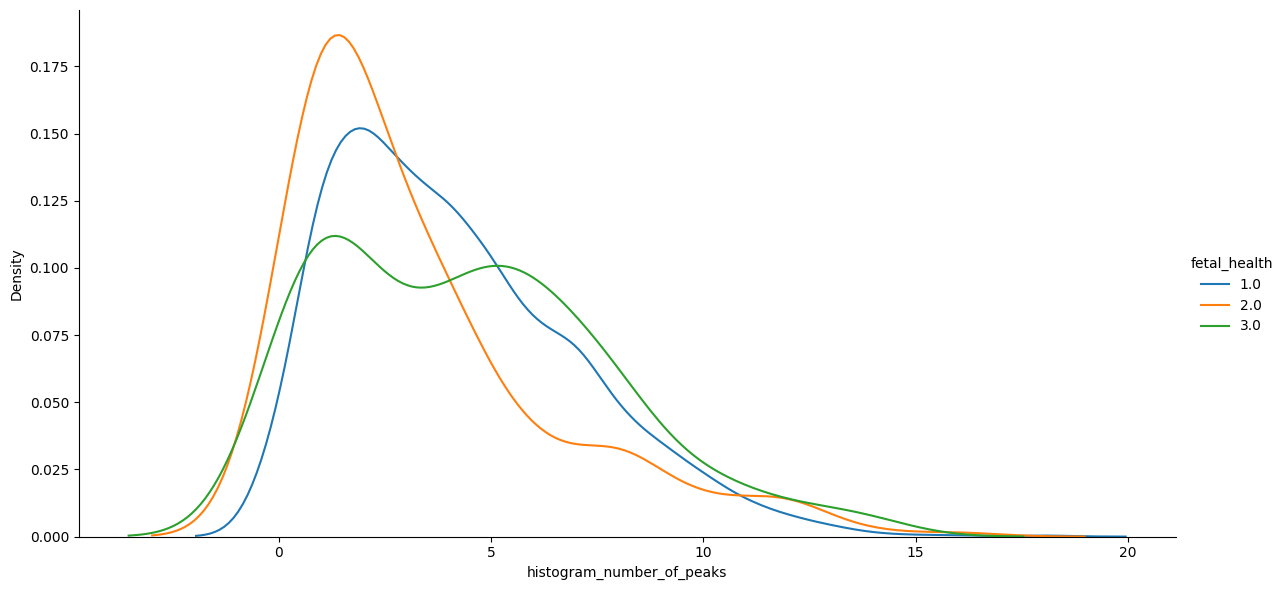

In [ ]:
kde('histogram_number_of_peaks')

In [ ]:
scatter('fetal_movement','uterine_contractions')

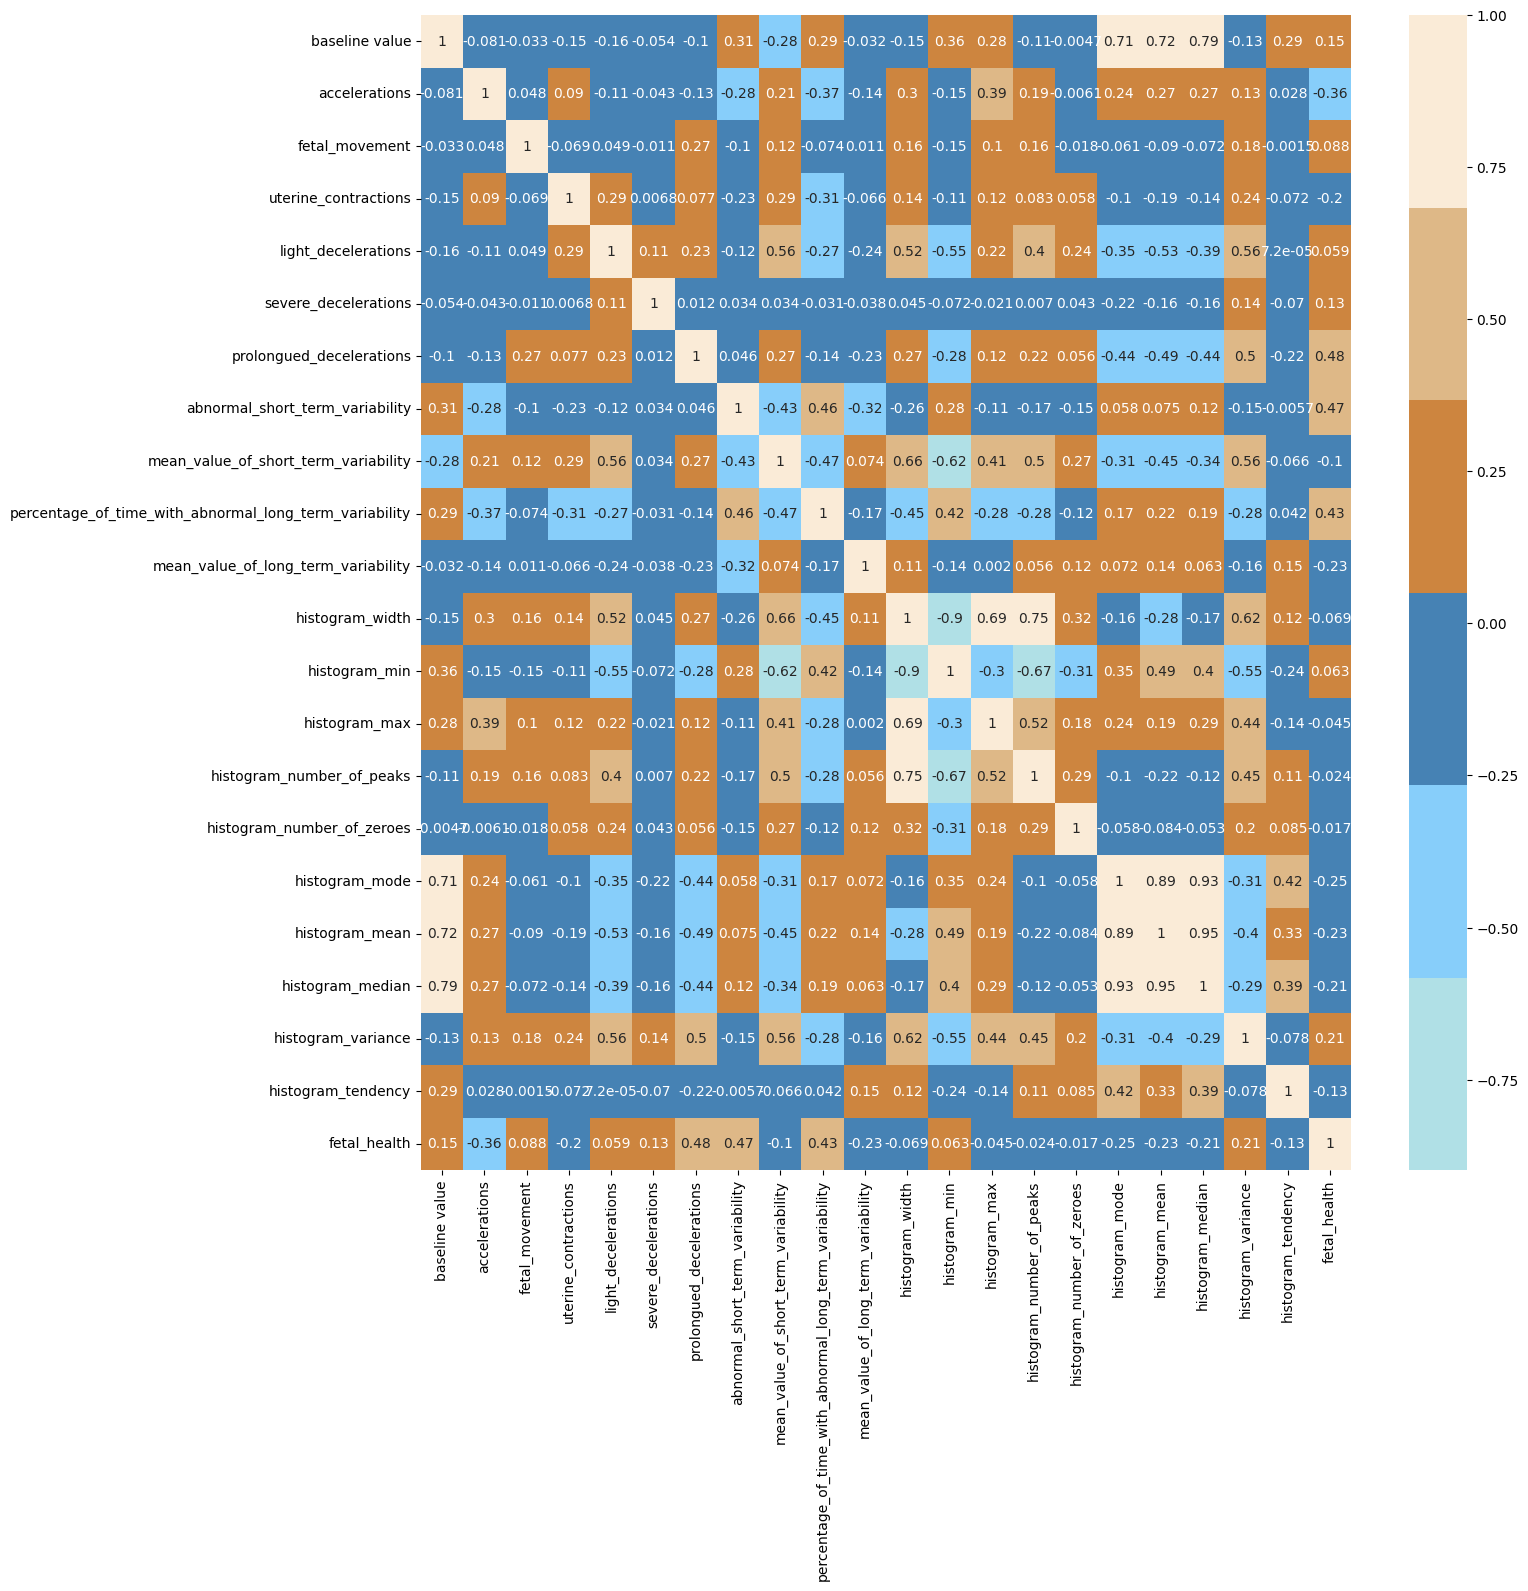

In [ ]:
# Examining correlation matrix using heatmap
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
cols = (["#B0E0E6", "#87CEFA", "#4682B4", "#CD853F", "#DEB887", "#FAEBD7"])

corrmat= data.corr()

f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat,cmap=cols,annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Defining independent and dependent attributes in training and test sets
X=data.drop(["fetal_health"],axis=1)
y=data["fetal_health"]

In [ ]:
# Setting up a standard scaler for the features and analyzing it thereafter
col_names = list(X.columns)
s_scaler = StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,1.069490e-15,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-4.010589e-17,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.336863e-17,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-1.336863e-16,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.347452e-17,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,6.684315e-18,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,1.336863e-17,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,-7.352747e-17,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,6.684315e-17,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,-5.347452e-17,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


In [ ]:
features=['baseline value', 'accelerations', 'fetal_movement','uterine_contractions', 'light_decelerations', 'severe_decelerations',
           'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
             'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability']

# **BOXPLOT AND OUTLIER DETECTION**

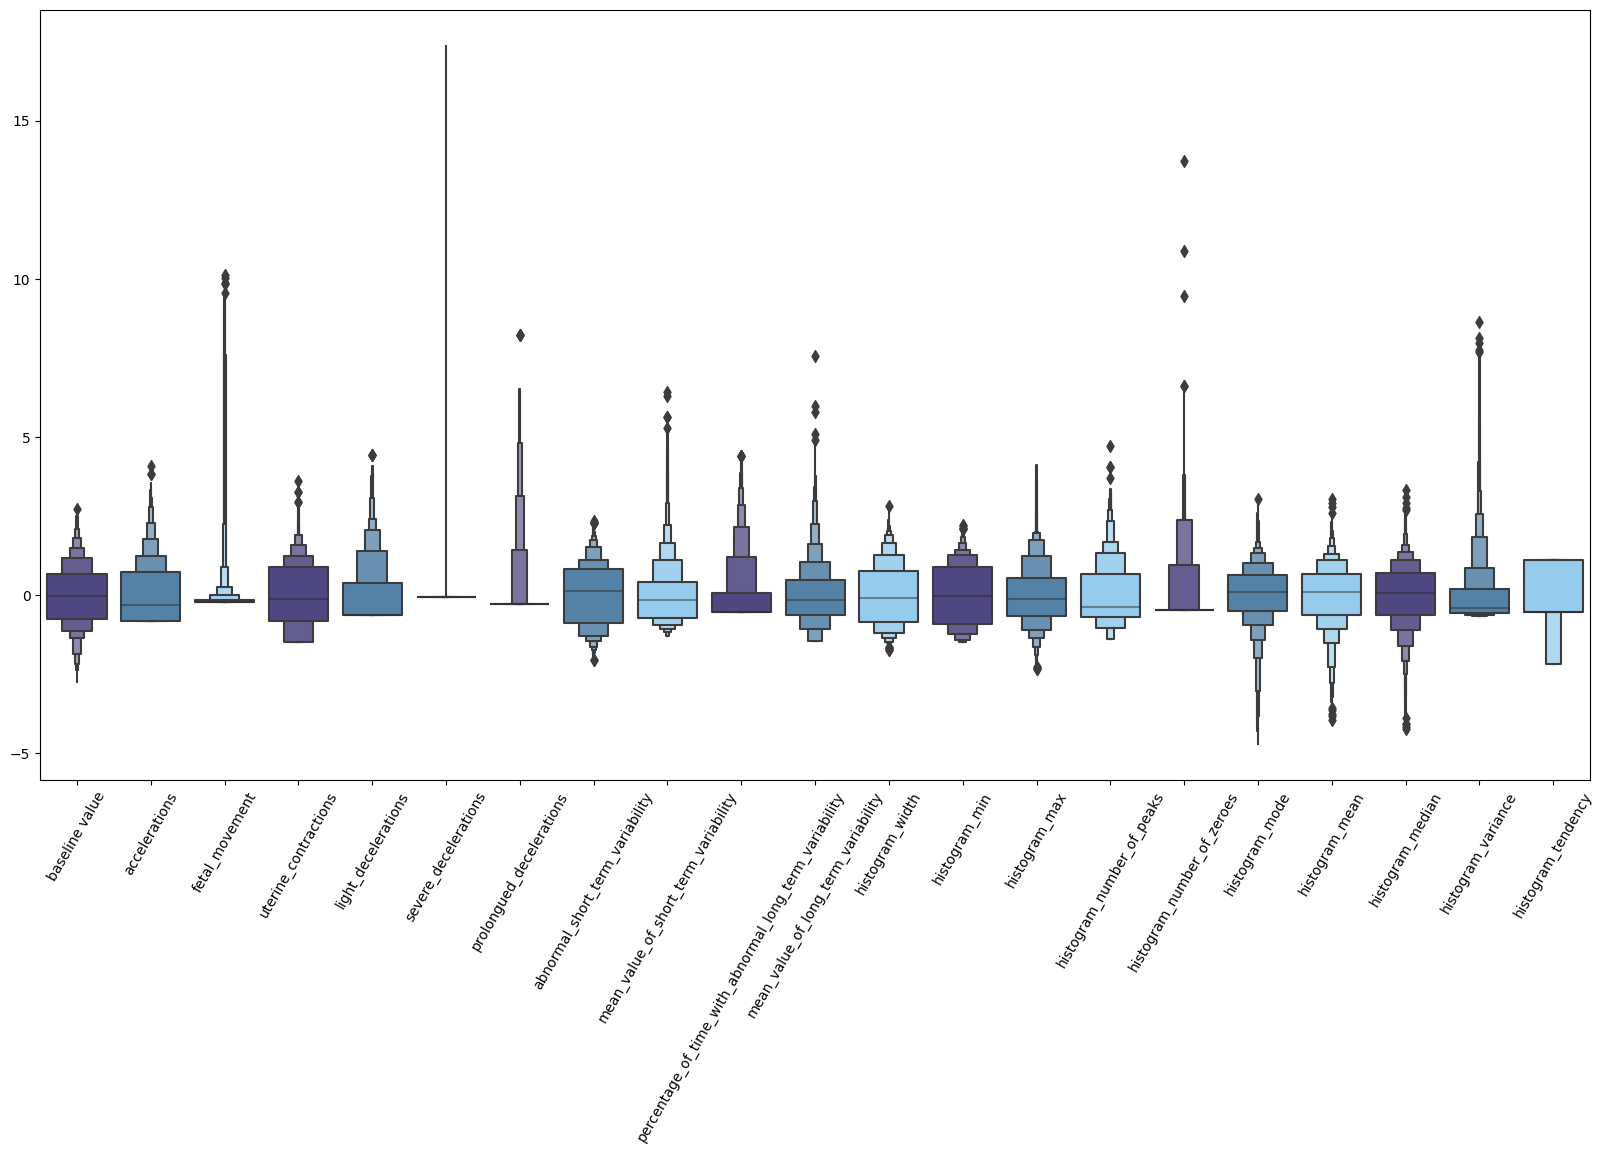

In [ ]:
#Plotting the scaled features using boxen plots
colors=["#483D8B","#4682B4", "#87CEFA"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled,palette = colors)
plt.xticks(rotation=60)
plt.show()

In [ ]:
# Create a sample dataset (replace this with your actual dataset)
datas = data['uterine_contractions']

# Calculate the IQR (Interquartile Range)
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the indices of the outliers
outlier_indices = np.where((datas < lower_bound) | (datas > upper_bound))

# Remove the outliers from the dataset
data_without_outliers = data[(datas >= lower_bound) & (datas <= upper_bound)]

# Print the outliers and the data without outliers
print("Outliers:", outlier_indices)
print("Data without outliers:", data_without_outliers)


Outliers: (array([], dtype=int64),)
Data without outliers:       baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_dece

# **GRADIENT BOOSTING CLASSIFIER**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Splitting the training and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

In [ ]:
pipeline_gbcl = Pipeline([('gbcl_classifier',GradientBoostingClassifier())])
pipeline_gbcl.fit(X_train, y_train)

Pipeline(steps=[('gbcl_classifier', GradientBoostingClassifier())])

In [ ]:
pip install dtreeviz

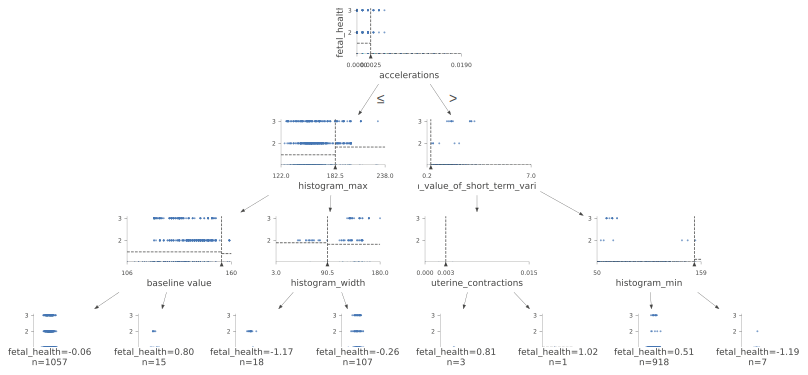

In [ ]:
import dtreeviz

# Assuming pipeline_gbcl is your scikit-learn pipeline with the GradientBoostingClassifier
gb_clf = pipeline_gbcl.named_steps['gbcl_classifier']
tree_number_to_visualize = 42

# Get the tree number 42
sub_tree_42 = gb_clf.estimators_[42, 0]

# Define class names as strings, not integers
class_names = ['1','2','3']

viz = dtreeviz.model(sub_tree_42,
               X_train=X,  # Your feature matrix
               y_train=y,  # Your target variable
               target_name='fetal_health',  # Name of the target variable
               feature_names=X.columns,  # Names of your features
               class_names=class_names  # Class names as strings
               #title=f'Tree {tree_number_to_visualize} visualization'
                     )

#viz.save("tree_visualization.svg")
wn.filterwarnings("ignore", category=UserWarning, module="matplotlib")
viz.view()


In [ ]:
import dtreeviz

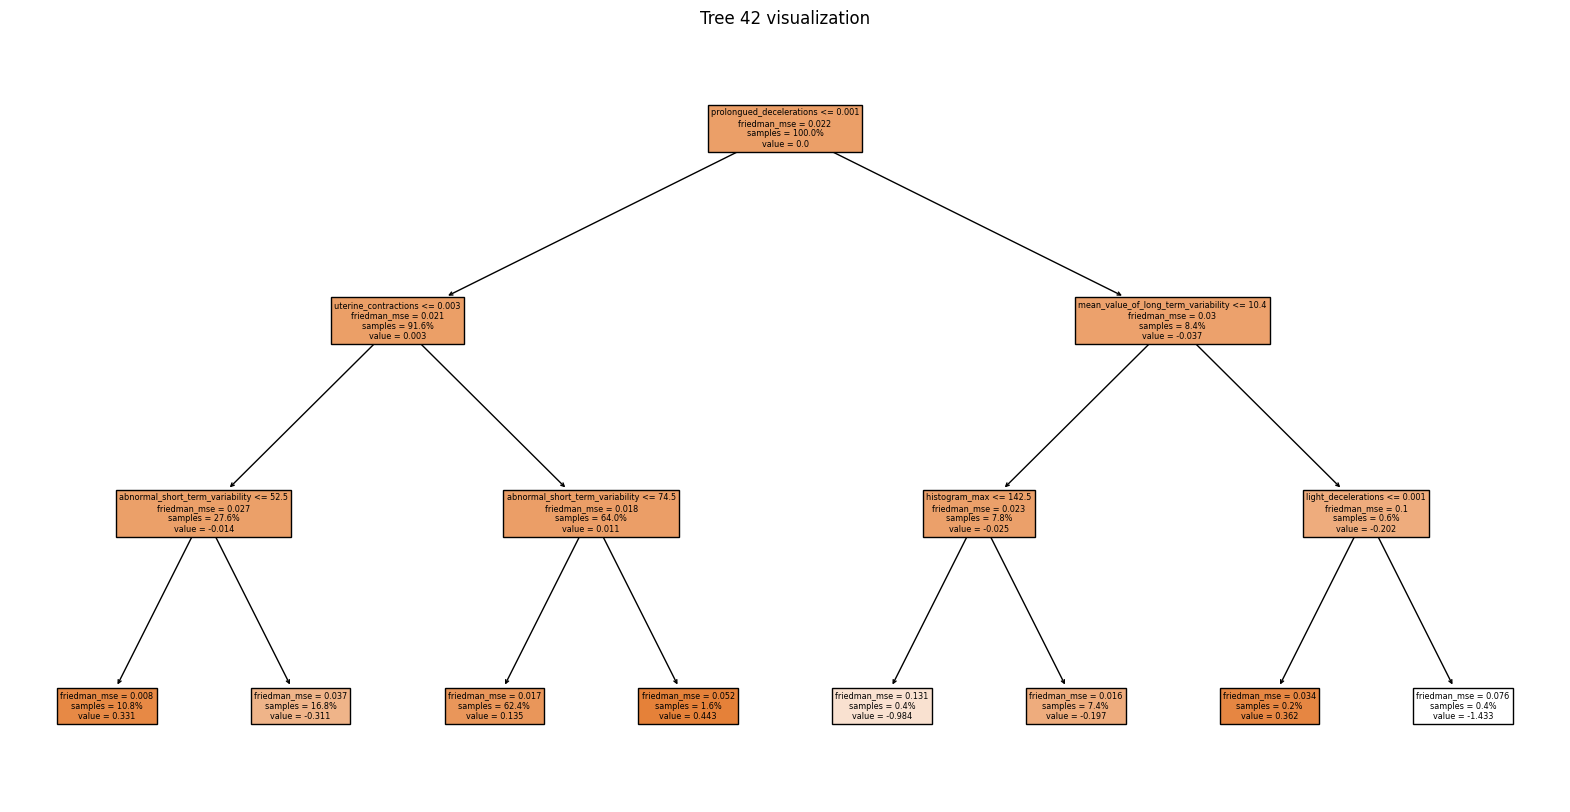

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming clf is your GradientBoostingClassifier
clf = GradientBoostingClassifier(max_depth=3, random_state=0)
clf.fit(X, y)
sub_tree_42 = clf.estimators_[42, 0]

plt.figure(figsize=(20, 10))
plot_tree(sub_tree_42, filled=True, feature_names=X.columns, class_names=['1', '2', '3'], proportion=True)
plt.title("Tree 42 visualization")
plt.show()


# **FEATURE SELECTION**

In [ ]:
from sklearn.feature_selection import RFE

num_features_to_select=21
rfe = RFE(estimator=pipeline_gbcl, n_features_to_select=num_features_to_select)

# Fit the RFE selector to your data
rfe.fit(X, y)

# Get the selected features
selected_features = rfe.support_

# Print the selected features
print("Selected features:", selected_features)

Selected features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_results_accuracy = []
cv_score = cross_val_score(pipeline_gbcl, X_train,y_train, cv=12)
cv_results_accuracy.append(cv_score)
print("GRADIENT BOOSTING CLASSIFIER :  %f " % ( cv_score.mean()))

GRADIENT BOOSTING CLASSIFIER :  0.944707 


# **HYPERPARAMETER WITH MODEL**

In [ ]:

# Define your hyperparameters as a dictionary
hyperparameters = {
    'n_estimators': 100,  # Number of boosting stages (trees)
    'learning_rate': 0.1,  # Step size shrinkage to prevent overfitting
    'max_depth': 3,  # Maximum depth of the individual trees
    'min_samples_split': 2,  # Minimum number of samples required to split a node
    'min_samples_leaf': 1,  # Minimum number of samples required at each leaf node
    'subsample': 1.0  # Fraction of samples used for fitting the trees
}



In [ ]:
# Baseline model of gradient boosting classifier with default parameters:
gbcl = GradientBoostingClassifier(**hyperparameters)
gbcl_model = gbcl.fit(X_train, y_train)
import pickle

# Specify the file name where you want to save the model
file_name = "GradientBoostingClassifier.pkl"

# Open a file in binary write mode and save the model
with open(file_name, 'wb') as file:
    pickle.dump(gbcl_model, file)
print(f"Baseline Gradient Boosting Classifier Score: {round(gbcl_model.score(X_test, y_test), 2)}")

pred_gbcl = gbcl_model.predict(X_test)

Baseline Gradient Boosting Classifier Score: 0.95


In [ ]:
file = open("/content/GradientBoostingClassifier.pkl", 'rb')
model = pickle.load(file)


In [ ]:
df=pd.DataFrame([[120,0,0,0,0,0,0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1]],columns=data.columns[:-1])

In [ ]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120,0,0,0,0,0,0,73,0.5,43,...,64,62,126,2,0,120,137,121,73,1


In [ ]:
# Cross validate Gradient Boosting Classifier model
scores_gbcl = cross_val_score(gbcl, X_train, y_train, cv = 8, n_jobs = 2, scoring = "accuracy")

print(f"CV scores for Gradient Boosting Classifier model:\n{scores_gbcl}")
print(f"CV Mean score: {round(scores_gbcl.mean(), 2)}")

CV scores for Gradient Boosting Classifier model:
[0.95774648 0.93896714 0.92488263 0.94366197 0.97641509 0.95283019
 0.93396226 0.95754717]
CV Mean score: 0.95


In [ ]:
np.save('x_train.npy', X_train)
np.save('x_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

# **HYPERPARAMETER TUNING**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
grid_vals = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

grid_gbc = GridSearchCV(estimator=model, param_grid=grid_vals, scoring='accuracy', cv=6, refit=True, return_train_score=True)

# Training and Prediction
grid_gbc.fit(X_train, y_train)
preds = grid_gbc.best_estimator_.predict(X_test)


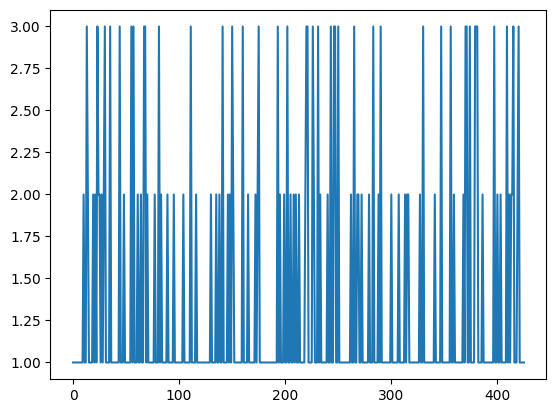

In [ ]:
plt.plot(preds)

# **FEDERATED LEARNING**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
x_train=np.load('/content/x_train.npy')
y_train=np.load('/content/y_train.npy')
x_test=np.load('/content/x_test.npy')
y_test=np.load('/content/y_test.npy')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import numpy as np
"""def create_global_model():

  global_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=25)
  return global_model"""


'def create_global_model():\n\n  global_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=25)\n  return global_model'

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(21,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
y_train

array([2., 1., 1., ..., 1., 2., 1.])

In [ ]:
[y_train.tolist()]

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train-1, num_classes=3)
y_train

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
def federated_learning():
  global_model= create_model()
  num_clients=3
  local_epochs= 20

  client_data= []
  for i in range(num_clients):
    X=x_train
    y=y_train
    client_data.append((X,y))
  for epoch in range(local_epochs):
    client_models=[]
    for client in range(num_clients):
      X,y = client_data[client]
      client_model = create_model()
      client_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['mse'])
      history = client_model.fit(X,y)
      client_models.append(client_model)

      loss = history.history['loss'][0]
      mse = history.history['mse'][0]
      print(f"Client {client+1} - Epoch {epoch+1} - Loss: {loss: .4f} - MSE: {mse:.4f}")

      average_weights = np.mean([model.get_weights() for model in client_models], axis=0)
      global_model.set_weights(average_weights)

    # Make predictions using the global model
    global_predictions = global_model.predict(x_test)

  return global_model, global_predictions

global_model,predictions= federated_learning()



54/54 [==============================] - 1s 2ms/step - loss: 6.9148 - mse: 0.1966
Client 1 - Epoch 1 - Loss:  6.9148 - MSE: 0.1966
54/54 [==============================] - 1s 2ms/step - loss: 9.3683 - mse: 0.1905
Client 2 - Epoch 1 - Loss:  9.3683 - MSE: 0.1905
54/54 [==============================] - 1s 2ms/step - loss: 22.0089 - mse: 0.2217
Client 3 - Epoch 1 - Loss:  22.0089 - MSE: 0.2217
54/54 [==============================] - 1s 2ms/step - loss: 7.5780 - mse: 0.2114
Client 1 - Epoch 2 - Loss:  7.5780 - MSE: 0.2114
54/54 [==============================] - 1s 2ms/step - loss: 22.4445 - mse: 0.2098
Client 2 - Epoch 2 - Loss:  22.4445 - MSE: 0.2098
54/54 [==============================] - 1s 2ms/step - loss: 13.0580 - mse: 0.1996
Client 3 - Epoch 2 - Loss:  13.0580 - MSE: 0.1996
54/54 [==============================] - 1s 2ms/step - loss: 8.8147 - mse: 0.1844
Client 1 - Epoch 3 - Loss:  8.8147 - MSE: 0.1844
54/54 [==============================] - 1s 2ms/step - loss: 53.3828 - mse: 0

In [ ]:
import pickle

# Specify the file name where you want to save the model
file_name = "Federated_model.pkl"

# Open a file in binary write mode and save the model
with open(file_name, 'wb') as file:
    pickle.dump(global_model, file)

In [ ]:
df=pd.DataFrame([[120,0,0,0,0,0,0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1]],columns=data.columns[:-1])

In [ ]:
file = open("/content/Federated_model.pkl", 'rb')
model = pickle.load(file)
prediction = model.predict(df)


1/1 [==============================] - 0s 63ms/step


In [ ]:
result=prediction.tolist()
class1=result.index(max(prediction.tolist()))
class1

0

In [ ]:
predict=[]
for i in range(len(predictions)):
  predict.append(np.mean(predictions[i]))
print(predict)

[0.3333333, 0.3333333, 0.33333337, 0.33333337, 0.33333334, 0.3333333, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.3333333, 0.33333334, 0.33333334, 0.33333334, 0.33333337, 0.33333334, 0.33333334, 0.33333328, 0.3333333, 0.3333333, 0.3333333, 0.33333334, 0.33333337, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333328, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.3333333, 0.33333334, 0.33333334, 0.3333333, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.3333333, 0.33333328, 0.33333334, 0.33333334, 0.3333333, 0.33333337, 0.3333333, 0.33333334, 0.33333334, 0.33333334, 0.33333328, 0.33333334, 0.33333337, 0.33333337, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.33333334, 0.3333333, 0.33333334, 0.33333334, 0.33333334, 0.3333333, 0.3333333, 0.33333334, 0.33333334, 0.3333

Text(0, 0.5, 'Federated learning - predictions')

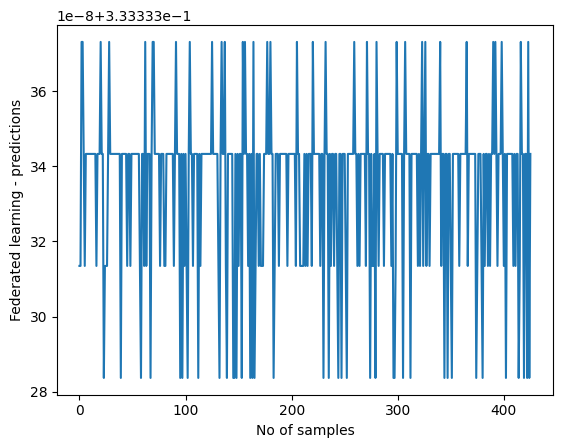

In [ ]:
import matplotlib.pyplot as plt

plt.plot(predict)
plt.xlabel('No of samples')
plt.ylabel('Federated learning - predictions')